<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/Shallow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import math
import numpy as np
import matplotlib as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

The Non- Linear function is Sin(5*pi*X) which has single input and single output.I have taken 300 datapoints in the range of (0,3)

In [ ]:
X=torch.linspace(0,3,300)
Y=torch.sin(5*math.pi*X)
target=Y[:]


Now, Let us build our first Shallow Model Fun1 which has 300 input features and 300 output features.This model has only one hidden unit which has Relu() as Activation function.


In [ ]:
class Fun1(nn.Module):
  def __init__(self,X):
    super(Fun1,self).__init__()
    self.fc1=nn.Linear(300,100)
    self.fc2=nn.Linear(100,50)
    self.fc3=nn.Linear(50,300)

  def forward(self,X):
    out=self.fc1(X)
    out=F.relu(self.fc2(out))
    out=self.fc3(out)
    return out
    
model=Fun1(X)

print(model)

Fun1(
  (fc1): Linear(in_features=300, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=300, bias=True)
)


Let us train our model. I have given 10 Epochs to calculate loss for each epoch.I'm using Adam Optimizer and learning rate is 0.001. For Calculating loss between output and target i'm using the inbuilt method MSELoss()

In [ ]:
criterion=nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_list=[]
final=torch.tensor(0)
Epochs=10
for epoch in range(Epochs):
  running_loss=0.0
  for i in range(300):
    optimizer.zero_grad()
    outputs=model(X)
    loss=criterion(outputs,target)
    running_loss+=loss.item()
    loss_list.append(running_loss)
    loss.backward()
    optimizer.step()
  print('[%d, %5d] loss: %.8f' %(epoch + 1, i, running_loss ))
  final=(outputs.flatten())


[1,   299] loss: 10.00971042
[2,   299] loss: 0.01082854
[3,   299] loss: 0.01108096
[4,   299] loss: 0.00919160
[5,   299] loss: 0.00952654
[6,   299] loss: 0.00861181
[7,   299] loss: 0.03749198
[8,   299] loss: 0.00550931
[9,   299] loss: 0.01077346
[10,   299] loss: 0.00798979


Now let us plot the graph for visualising Loss Vs Epochs

Text(0.5, 1.0, 'ModelLoss')

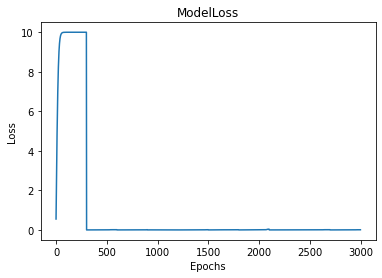

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ModelLoss')

The New model is the scatter plot.Since our new model is in convergence with old model , our network is working very well. 

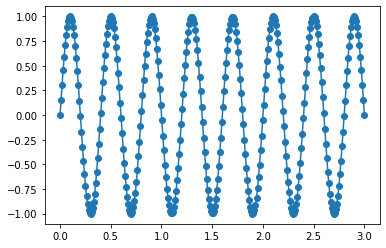

In [ ]:
plt.plot(X,Y)
graph2=final
final_model=graph2.detach()
plt.scatter(X,final_model)


In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)

50450


Fun2(
  (fc1): Linear(in_features=300, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=69, bias=True)
  (fc3): Linear(in_features=69, out_features=300, bias=True)
)
